# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans

# Reading data

In [2]:
df=pd.read_csv('Sales.csv')
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [3]:
df.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [5]:
df.shape

(185950, 11)

In [6]:
df.drop("Purchase Address", axis=1, inplace=True)
df.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,12,11.95,Atlanta,12


In [8]:
import pandas as pd

# Assuming the data is in a DataFrame named 'df'
# Check for missing values
print(df.isnull().sum())

# Convert 'Order Date' column to datetime type
df['Order Date'] = pd.to_datetime(df['Order Date'])




Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Month               0
Sales               0
City                0
Hour                0
dtype: int64


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming the data is in a DataFrame named 'df'

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Product' column
df['Product_Encoded'] = label_encoder.fit_transform(df['Product'])

# Encode 'City' column
df['City_Encoded'] = label_encoder.fit_transform(df['City'])

# Now the 'Product' and 'City' columns are replaced with numeric labels.


In [10]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Sales,City,Hour,Product_Encoded,City_Encoded
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,12,1700.00,New York City,0,13,5
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,12,600.00,New York City,7,11,5
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,12,11.95,New York City,18,15,5
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,12,149.99,San Francisco,15,2,7
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,12,11.95,Atlanta,12,15,0


In [11]:
import pandas as pd

# Assuming the data is in a DataFrame named 'df'

# Convert 'Order Date' column to datetime type
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract the year and replace the 'Order Date' column with it
df['Order year'] = df['Order Date'].dt.year


In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Sales,City,Hour,Product_Encoded,City_Encoded,Order year
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,12,1700.00,New York City,0,13,5,2019
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,12,600.00,New York City,7,11,5,2019
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,12,11.95,New York City,18,15,5,2019
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,12,149.99,San Francisco,15,2,7,2019
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,12,11.95,Atlanta,12,15,0,2019


In [13]:
import pandas as pd

# Assuming the data is in a DataFrame named 'df'

# List of columns to drop
columns_to_drop = ["Product", "City","Order Date","Order ID"]

# Drop the columns
df.drop(columns_to_drop, axis=1, inplace=True)


In [14]:
df.head()

,Quantity Ordered,Price Each,Month,Sales,Hour,Product_Encoded,City_Encoded,Order year
0,1,1700.00,12,1700.00,0,13,5,2019
1,1,600.00,12,600.00,7,11,5,2019
2,1,11.95,12,11.95,18,15,5,2019
3,1,149.99,12,149.99,15,2,7,2019
4,1,11.95,12,11.95,12,15,0,2019


In [15]:
x=df.drop('Sales',axis=1)
x.head()

,Quantity Ordered,Price Each,Month,Hour,Product_Encoded,City_Encoded,Order year
0,1,1700.00,12,0,13,5,2019
1,1,600.00,12,7,11,5,2019
2,1,11.95,12,18,15,5,2019
3,1,149.99,12,15,2,7,2019
4,1,11.95,12,12,15,0,2019


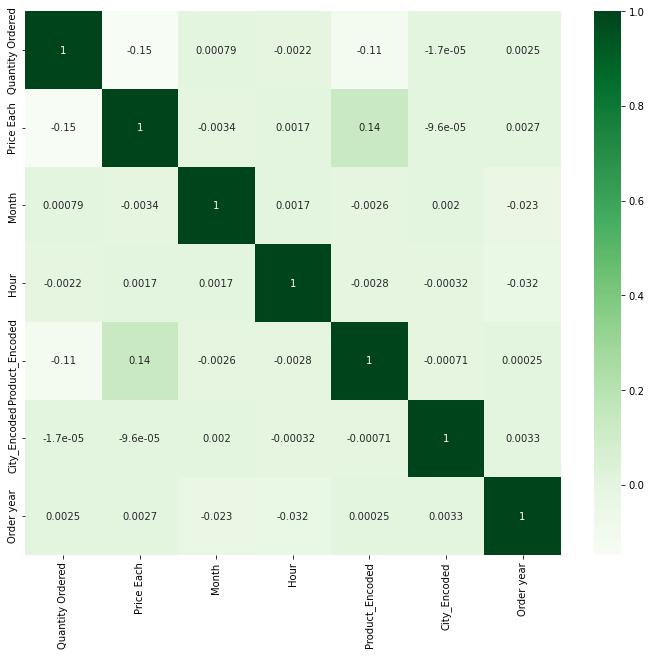

In [16]:
plt.figure(figsize=(12,10))
cor=x.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Greens)
plt.show()

In [17]:
df.describe()

,Quantity Ordered,Price Each,Month,Sales,Hour,Product_Encoded,City_Encoded,Order year
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,7.059140,185.490917,14.413305,9.134794,4.532417,2019.000183
std,0.442793,332.731330,3.502996,332.919771,5.423416,5.383887,2.412355,0.013521
min,1.000000,2.990000,1.000000,2.990000,0.000000,0.000000,0.000000,2019.000000
25%,1.000000,11.950000,4.000000,11.950000,11.000000,5.000000,3.000000,2019.000000
50%,1.000000,14.950000,7.000000,14.950000,15.000000,7.000000,5.000000,2019.000000
75%,1.000000,150.000000,10.000000,150.000000,19.000000,15.000000,7.000000,2019.000000
max,9.000000,1700.000000,12.000000,3400.000000,23.000000,18.000000,8.000000,2020.000000


# Data visualization

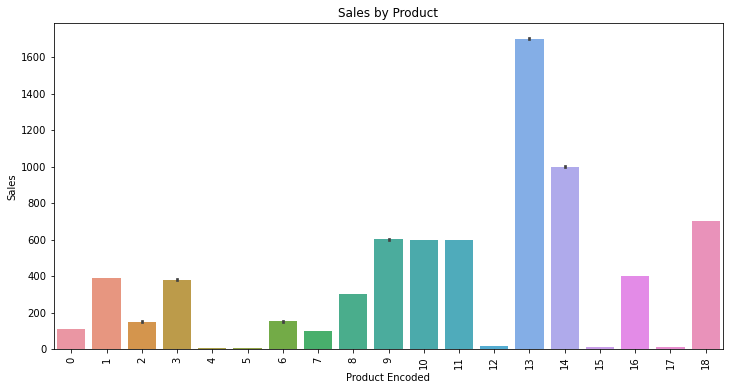

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the data is in a DataFrame named 'df'

# Bar plot for Sales by Product
plt.figure(figsize=(12, 6))
sns.barplot(x='Product_Encoded', y='Sales', data=df)
plt.xlabel('Product Encoded')
plt.ylabel('Sales')
plt.title('Sales by Product')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the data is in a DataFrame named 'df'

# Bar plot for Sales by Product
plt.figure(figsize=(12, 6))
sns.barplot(x='City_Encoded', y='Sales', data=df)
plt.xlabel('City Encoded')
plt.ylabel('Sales')
plt.title('Sales by Product')
plt.xticks(rotation=90)
plt.show()

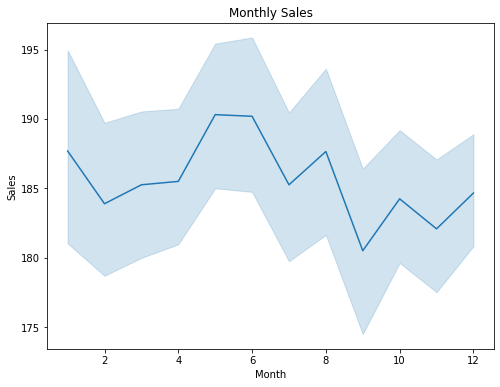

In [19]:
# Line plot for Monthly Sales
plt.figure(figsize=(8, 6))
sns.lineplot(x='Month', y='Sales', data=df)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.show()

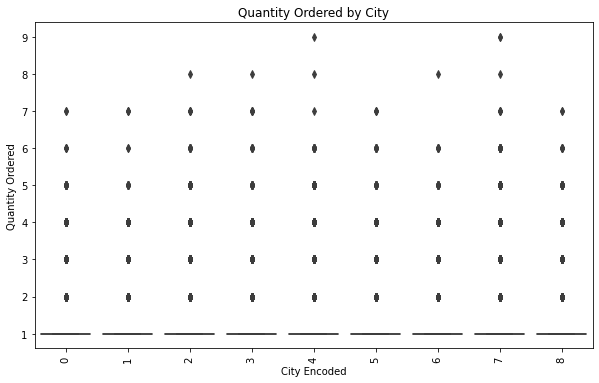

In [20]:

# Box plot for Quantity Ordered by City
plt.figure(figsize=(10, 6))
sns.boxplot(x='City_Encoded', y='Quantity Ordered', data=df)
plt.xlabel('City Encoded')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered by City')
plt.xticks(rotation=90)
plt.show()

# Linear Regression model

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming the data is in a DataFrame named 'df'
X = df.drop(['Sales'], axis=1)  # Features
y = df['Sales']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Make predictions using Linear Regression model
y_pred = linear_regression.predict(X_test)

# Calculate evaluation metrics for Linear Regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Linear Regression:')
print('Mean Squared Error:', mse)
print('R-squared:', r2)


Linear Regression:
Mean Squared Error: 77.68158424228025
R-squared: 0.9993021053436638


# K-Nearest Neighbors classifier

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming the data is in a DataFrame named 'df'

# Split data into features (X) and target variable (y)
X = df.drop(['Product_Encoded'], axis=1)  # Features
y = df['Product_Encoded']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Make predictions using K-Nearest Neighbors classifier
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy and confusion matrix for K-Nearest Neighbors
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('K-Nearest Neighbors Classifier:')
print('Accuracy:', accuracy)
#print('Confusion Matrix:')
#print(conf_matrix)


K-Nearest Neighbors Classifier:
Accuracy: 0.9600430223178273


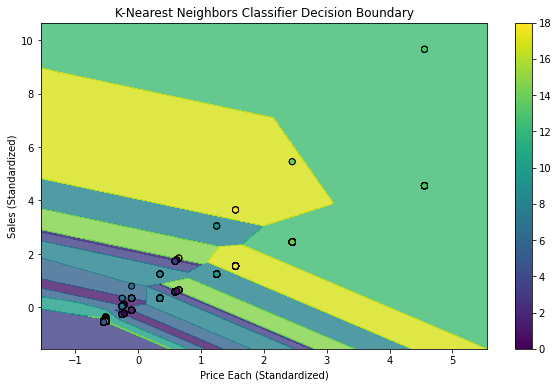

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Assuming the data is in a DataFrame named 'df'

# Select two features for visualization
X = df[['Price Each', 'Sales']]
y = df['Product_Encoded']

# Standardize the features (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and train K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_scaled, y)

# Define meshgrid for decision boundary visualization
h = .02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Get predicted labels for the meshgrid points
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k')
plt.xlabel('Price Each (Standardized)')
plt.ylabel('Sales (Standardized)')
plt.title('K-Nearest Neighbors Classifier Decision Boundary')
plt.colorbar()
plt.show()


# Neural Networks

Epoch 1/10
3719/3719 [==============================] - 6s 2ms/step - loss: 6560.5737 - val_loss: 237.6703
Epoch 2/10
3719/3719 [==============================] - 6s 2ms/step - loss: 135.8992 - val_loss: 88.6558
Epoch 3/10
3719/3719 [==============================] - 6s 2ms/step - loss: 76.4026 - val_loss: 46.6723
Epoch 4/10
3719/3719 [==============================] - 6s 2ms/step - loss: 49.8629 - val_loss: 23.3036
Epoch 5/10
3719/3719 [==============================] - 6s 2ms/step - loss: 36.2140 - val_loss: 14.7022
Epoch 6/10
3719/3719 [==============================] - 6s 2ms/step - loss: 22.8715 - val_loss: 41.0364
Epoch 7/10
3719/3719 [==============================] - 6s 2ms/step - loss: 18.7320 - val_loss: 7.8880
Epoch 8/10
3719/3719 [==============================] - 6s 1ms/step - loss: 18.5411 - val_loss: 7.0050
Epoch 9/10
3719/3719 [==============================] - 5s 1ms/step - loss: 16.3077 - val_loss: 18.3114
Epoch 10/10
3719/3719 [==============================] - 6s 2m

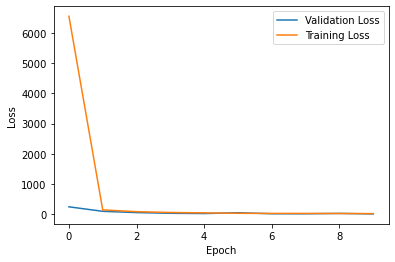

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Assuming the data is in a DataFrame named 'df'

# Split data into features (X) and target variable (y)
X = df.drop(['Sales'], axis=1)  # Features
y = df['Sales']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize a neural network model for regression
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Output layer for regression (no activation function)
])

# Compile the model with Mean Squared Error (MSE) as the loss function
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and keep track of the training history
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot validation loss and training loss
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



# Gradient Boosting Regressor

Mean Squared Error: 0.9487073424036397
R-squared: 0.9999914767728909


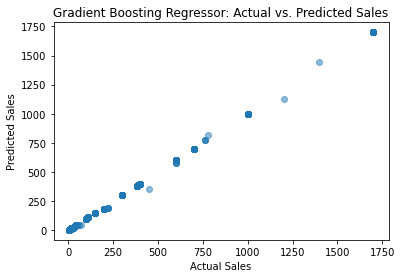

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming the data is in a DataFrame named 'df'

# Split data into features (X) and target variable (y)
X = df.drop(['Sales'], axis=1)  # Features
y = df['Sales']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Calculate Mean Squared Error and R-squared for evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Plot the predicted vs. actual sales values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Gradient Boosting Regressor: Actual vs. Predicted Sales')
plt.show()


# Hyperparameter Tuning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming the data is in a DataFrame named 'df'

# Split data into features (X) and target variable (y)
X = df.drop(['Sales'], axis=1)  # Features
y = df['Sales']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Define hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.05, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 4, 5]  # Maximum depth of individual trees
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best model from the grid search
best_gb_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_gb_model.predict(X_test_scaled)

# Calculate Mean Squared Error and R-squared for evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Best hyperparameters:', grid_search.best_params_)
print('Mean Squared Error (Best Model):', mse)
print('R-squared (Best Model):', r2)
